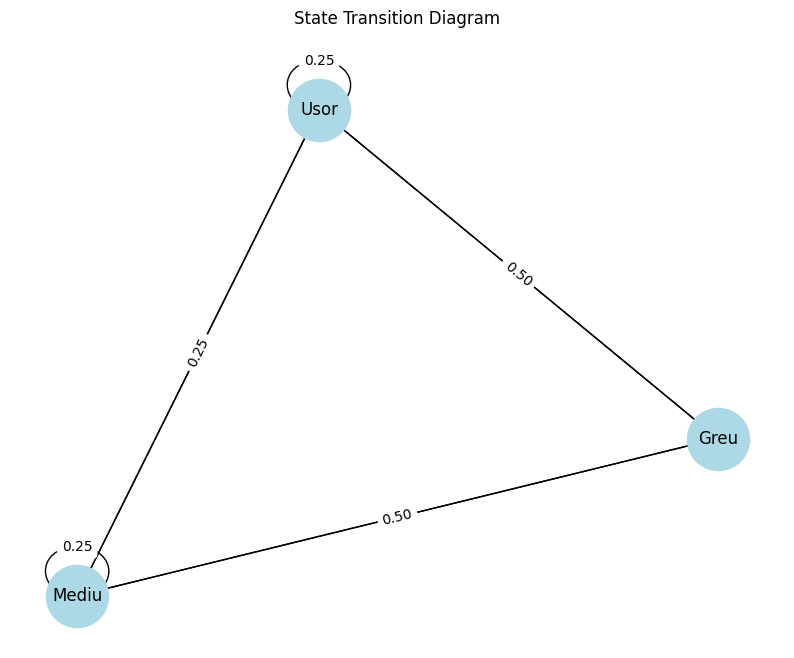


Observed grades: ['FB', 'FB', 'S', 'B', 'B', 'S', 'B', 'B', 'NS', 'B', 'B', 'S']
Most likely test difficulties: ['Greu', 'Usor', 'Greu', 'Usor', 'Greu', 'Mediu', 'Greu', 'Usor', 'Greu', 'Usor', 'Greu', 'Mediu']
Probability of this sequence: 7.32594289717248e-08


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from hmmlearn import hmm

# Define the states and observations
states = ["Usor", "Mediu", "Greu"]
observations = ["FB", "B", "S", "NS"]
n_states = len(states)
n_observations = len(observations)

# Initial state distribution (equal probability for first test)
state_probability = np.array([1/3, 1/3, 1/3])

# Correct transition probabilities based on problem description
transition_probability = np.array([
    [0.25, 0.25, 0.50],  # From Easy
    [0.25, 0.25, 0.50],  # From Medium
    [0.50, 0.50, 0.00]   # From Hard
])

# Emission probabilities from the given ranges
emission_probability = np.array([
    [0.2, 0.3, 0.4, 0.1],  # Easy test
    [0.15, 0.25, 0.5, 0.1],  # Medium test
    [0.1, 0.2, 0.4, 0.3]   # Hard test
])

# Create and train the HMM model
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = state_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

# Create state diagram
def plot_state_diagram():
    G = nx.DiGraph()
    
    # Add nodes
    for state in states:
        G.add_node(state)
    
    # Add edges with probabilities
    for i, state1 in enumerate(states):
        for j, state2 in enumerate(states):
            if transition_probability[i][j] > 0:
                G.add_edge(state1, state2, 
                          weight=transition_probability[i][j],
                          label=f'{transition_probability[i][j]:.2f}')
    
    # Draw the graph
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 8))
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                          node_size=2000)
    nx.draw_networkx_labels(G, pos)
    
    # Draw edges
    nx.draw_networkx_edges(G, pos)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels)
    
    plt.title("State Transition Diagram")
    plt.axis('off')
    plt.show()

# Plot the state diagram
plot_state_diagram()

# For part b, convert the sequence to numerical form
# FB=0, B=1, S=2, NS=3
sequence = "FB,FB,S,B,B,S,B,B,NS,B,B,S".split(',')
numerical_sequence = np.array([observations.index(x) for x in sequence]).reshape(-1, 1)

# Find most likely sequence of states
hidden_states = model.predict(numerical_sequence)

# Convert numerical states back to labels
state_sequence = [states[state] for state in hidden_states]
print("\nObserved grades:", sequence)
print("Most likely test difficulties:", state_sequence)
print("Probability of this sequence:", np.exp(model.score(numerical_sequence)))